In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
X, y = fetch_openml(data_id = 44, return_X_y=True)

Xtr, Xte, ytr, yte = train_test_split(X,y,random_state=1234)

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.transform(Xte)

encoder = LabelEncoder()
ytr = 2*encoder.fit_transform(ytr)-1
yte = 2*encoder.transform(yte)-1

In [3]:
def EvalELM(alpha,W,theta,X):
    return np.dot(np.tanh(X@W+theta),alpha)

# Questão 1

Sintetize a aplicação $φ$ resolvendo o problema de quadrados mínimos com respeito ao conjunto de treinamento considerando $M = 1000$.

In [4]:
# Tamanho da Mensagem
N = 57

# No de Mensagens
K = 3450

# No de funções g
M = 1000

# Inicialização Aleatória de W e theta
W = np.random.randn(N,M)
theta = np.random.randn(M)

# Função exercita a predição a partir da saída
@np.vectorize
def predicao(x):
    return 1 if x >= 0 else -1

In [5]:
G = np.tanh(Xtr@W+theta)
G

array([[-0.99999309,  0.99999994,  1.        , ...,  0.99409289,
        -0.99999991, -0.99993604],
       [-0.96994929,  1.        ,  0.99999998, ...,  0.99940102,
        -0.99958062, -0.99999998],
       [-0.99999976, -0.06646816,  1.        , ..., -0.98118692,
        -1.        , -1.        ],
       ...,
       [-0.91385902,  0.96327253,  0.99983756, ..., -0.97380021,
         0.99974328,  0.9975436 ],
       [ 0.98116067,  0.88547037,  0.999911  , ..., -0.9999533 ,
        -0.22592931, -0.99776842],
       [ 0.98126813,  0.98872665,  0.87575474, ..., -0.99999974,
        -0.48644588,  0.99986185]])

In [6]:
A = np.zeros((M,M))
b = np.zeros(M)

for i in range(M):
    for j in range(M):
        A[i,j] = np.dot(G[:,i], G[:,j])
    b[i] = np.dot(ytr, G[:,i])

A, b

(array([[2784.90307978,  531.39582794, -287.81309575, ..., -554.63939239,
          244.05683879,  261.04481489],
        [ 531.39582794, 2846.20014898,  848.75877372, ...,  277.12996608,
         -547.93028628, -538.57992266],
        [-287.81309575,  848.75877372, 2973.74208249, ...,  126.14554181,
         -756.91447323,  266.0992776 ],
        ...,
        [-554.63939239,  277.12996608,  126.14554181, ..., 2938.14025489,
         -691.03754344, -249.66300018],
        [ 244.05683879, -547.93028628, -756.91447323, ..., -691.03754344,
         2865.20140886,  247.7033722 ],
        [ 261.04481489, -538.57992266,  266.0992776 , ..., -249.66300018,
          247.7033722 , 2858.40168128]]),
 array([-3.45353874e+02, -7.10876044e+02, -7.18475626e+02,  1.10497752e+02,
         3.49820895e+02,  1.06984215e+03,  4.06862023e+02, -6.52133943e+02,
         3.20182142e+02, -4.49800347e+02, -1.34595512e+03, -9.74595029e+02,
         3.97000545e+02,  1.23496039e+03, -9.68224928e+02, -6.39123756e+0

In [7]:
alpha = np.linalg.solve(A, b)
alpha

array([-3.57988821e-02,  1.83301143e-02, -6.15317650e-02,  4.04130000e-02,
       -9.02723646e-03, -2.93224800e-02,  3.47392474e-02, -1.69007302e-02,
        1.03636156e-02, -6.35716359e-02,  3.52922285e-02,  4.61021532e-02,
       -2.48974223e-02, -5.47242077e-02, -1.22732467e-02, -2.80636176e-02,
       -3.67888939e-02, -4.27131166e-04, -2.95666858e-02, -3.36575298e-02,
        3.01234480e-02, -2.74544840e-02, -4.25269322e-02, -4.34459881e-02,
       -1.83311135e-02,  5.22466613e-02, -5.40049292e-03,  2.02960262e-02,
        3.64670884e-02, -5.71348829e-02, -6.36103680e-03, -1.35516711e-02,
        2.49360875e-02,  2.84928254e-02, -4.73461730e-02,  7.08469982e-02,
        2.97568051e-02, -2.09524391e-02,  4.52228156e-02,  6.38261562e-03,
       -2.02341569e-02, -9.64876095e-02,  3.74570216e-02, -7.05898323e-02,
        4.85281539e-02,  5.01336880e-02,  8.92439540e-03,  5.35938902e-02,
       -3.19797552e-02,  3.65157905e-02,  4.72973069e-02, -1.43637441e-02,
        2.48272211e-02, -

Implementei o caso Discreto em $\mathbb{R}^N$ do Método dos Quadrados Mínimos.

Após inicializar as variáveis $M$, $N$ e $K$ e os vetores/matrizes aleatoriamente em distribuição normal $\boldsymbol{W} \in \mathbb{R}^{N \times M}$ e $\boldsymbol{\theta} \in \mathbb{R}^M$, determinei a matriz $\boldsymbol{G} \in \mathbb{R}^{K \times M}$ por meio de $\boldsymbol{G} = \tanh \left(\boldsymbol{X_{treino}} \boldsymbol{W} + \boldsymbol{\theta} \right)$.

Então, pude calcular $\boldsymbol{A} \in \mathbb{R}^{M \times M}$ tal que $a_{i j} = \sum_{k=1}^K{g_i \left(x_k\right) · g_j\left(x_k\right)}$ e $\boldsymbol{b} \in \mathbb{R}^{M}$ tal que $b_{i} = \sum_{k=1}^K{g_i\left(x_k\right) · y_k}$.

Finalmente, determinei $\boldsymbol{\alpha}$ resolvendo o sistema linear $\boldsymbol{A} \boldsymbol{\alpha} = \boldsymbol{b}$.

# Questão 2

Ainda usando o conjunto de treinamento, isto é, `Xtr` e `ytr`, determine a acurácia e a taxa de falsos positivos.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [9]:
def plot_confusion_matrix(cf_mat, labels, tipo):
  plt.figure(figsize=(12,9))

  sns.heatmap(cf_mat/np.sum(cf_mat, axis=0), annot=True, square=True, cmap="Blues", fmt=".2%", xticklabels=labels, yticklabels=labels)

  plt.title(f"Matrix de confusão - Dados de {tipo}")  
  plt.xlabel("Real")
  plt.ylabel("Predito")

  plt.show()

def get_metrics(cf_mat):
    AC = (cf_mat[0][0] + cf_mat[1][1]) / np.sum(cf_mat)
    TFP = cf_mat[1][0] / np.sum(cf_mat[:,0])
    return AC, TFP

def avaliar(W, theta, alpha, X, y):
    pred = EvalELM(alpha,W,theta,X)
    phi = predicao(pred)

    cf_mat = confusion_matrix(y, phi)
    plot_confusion_matrix(cf_mat, ["Não Spam","Spam"], "Treinamento")

    AC, TFP = get_metrics(cf_mat)
    print("AC  = %5.2f%%" %(100*AC))
    print("TFP = %05.2f%%" %(100*TFP))
    return AC, TFP

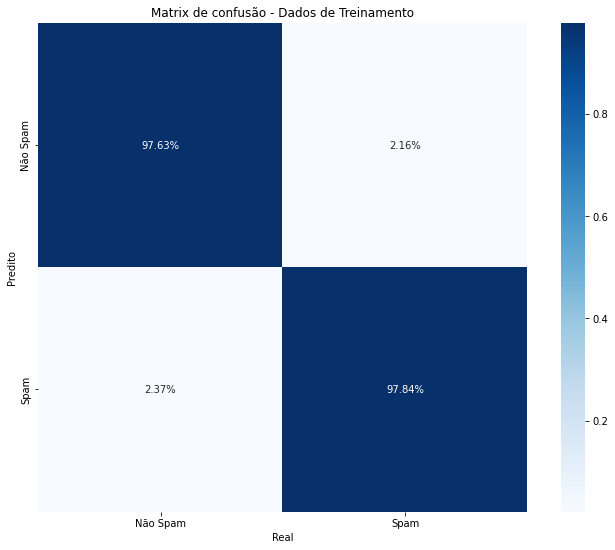

AC  = 97.71%
TFP = 02.37%


(0.9771014492753624, 0.023696682464454975)

In [10]:
avaliar(W, theta, alpha, Xtr, ytr)

Após treinar o modelo, reaproveitei o método `confusion_matrix` de `sklearn.metrics` para criar funções que determinam a acurácia $AC$ e a taxa de falso positivos $TFP$ do modelo.

Ao executar para o conjunto de treino, obtive $AC = 97,71\%$ e $TFP = 2,37\%$. Esses resultados são excelentes: a alta acurácia demonstra que o modelo está predizendo a classe corretamente para a maioria do conjunto de treino e a baixa taixa de falso positivo mostra que o modelo raramente prejudicaria o usuário do serviço de email ao enviar para a caixa de spam um email que não o é.



# Questão 3

Usando o conjunto de teste, isto é, `Xte` e `yte`, calcule a acurácia e a taxa de falsos positivos.

O desempenho no conjunto de teste é consistente com o esperado, isto é, a acurácia e a taxa de falsos positivos são semelhantes aos valores obtidos considerando o conjunto de treinamento?

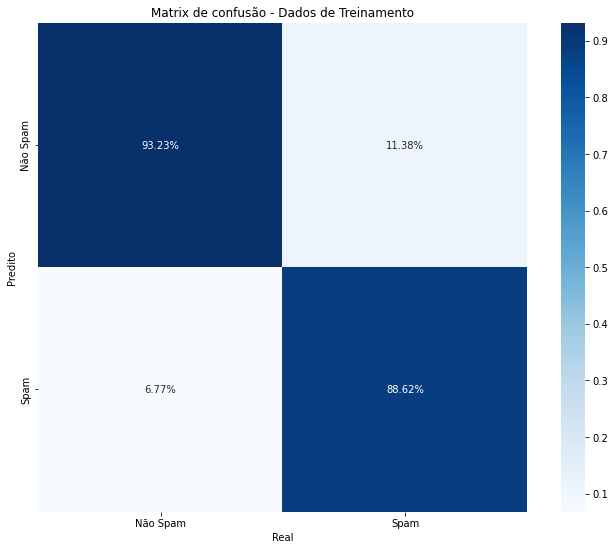

AC  = 91.40%
TFP = 06.77%


(0.9139878366637706, 0.06772334293948126)

In [11]:
avaliar(W, theta, alpha, Xte, yte)

Aplicando novamente as métricas para o conjunto de teste, os resultados pioraram um pouco, mas permanecem bons.
A acurácia reduziu para $AC = 91,40\%$ (diferença de $6,31\%$) e a taxa de falso positivo aumentou para $TFP = 6,77\%$ (incremento de $4,40\%$).

Nesse sentido, podemos concluir que os resultados são semelhantes, uma vez que é esperado que haja uma pequena piora nas métricas. Isso ocorre porque o modelo foi treinado apenas com o conjunto de treinamento e não com o conjunto de teste. Ainda, um grupo de apenas $K = 3450$ emails pode não representar bem a diversidade do conjunto universo de emails, levando a um pequeno overfiting.